## Tips on practical use

Decision trees tend to overfit on data with a large number of features. Getting the right ratio of samples to number of features is important, since a tree with few samples in high dimensional space is very likely to overfit.


Consider performing dimensionality reduction (PCA, ICA, or Feature selection) beforehand to give your tree a better chance of finding features that are discriminative.


Visualise your tree as you are training by using the export function. Use max_depth=3 as an initial tree depth to get a feel for how the tree is fitting to your data, and then increase the depth.


Remember that the number of samples required to populate the tree doubles for each additional level the tree grows to. Use max_depth to control the size of the tree to prevent overfitting.


Use min_samples_split or min_samples_leaf to control the number of samples at a leaf node. A very small number will usually mean the tree will overfit, whereas a large number will prevent the tree from learning the data.

Try min_samples_leaf=5 as an initial value. If the sample size varies greatly, a float number can be used as percentage in these two parameters. The main difference between the two is that min_samples_leaf guarantees a minimum number of samples in a leaf, while min_samples_split can create arbitrary small leaves, though min_samples_split is more common in the literature.


Balance your dataset before training to prevent the tree from being biased toward the classes that are dominant. Class balancing can be done by sampling an equal number of samples from each class, or preferably by normalizing the sum of the sample weights (sample_weight) for each class to the same value. Also note that weight-based pre-pruning criteria, such as min_weight_fraction_leaf, will then be less biased toward dominant classes than criteria that are not aware of the sample weights, like min_samples_leaf.


If the samples are weighted, it will be easier to optimize the tree structure using weight-based pre-pruning criterion such as min_weight_fraction_leaf, which ensure that leaf nodes contain at least a fraction of the overall sum of the sample weights.


If the input matrix X is very sparse, it is recommended to convert to sparse csc_matrix before calling fit and sparse csr_matrix before calling predict. Training time can be orders of magnitude faster for a sparse matrix input compared to a dense matrix when features have zero values in most of the samples.

## Homework

1. Prove that ensemble of weak independent learners forms a strong learner.

2. Download dataset from https://www.kaggle.com/usgs/earthquake-database . Clean the data and predict magnitude using any tree-based method. Quality metric: 2-1 croosvalidated mean squared error. Visualise your results


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [28]:
df = pd.read_csv('earthquake_database.csv', )
df['Date'] = pd.to_datetime(df['Date'])
df.drop(['Time', 'Magnitude Error', 'Horizontal Distance', 'Horizontal Error', 'Magnitude Seismic Stations', 'ID'],
        axis = 1, inplace = True)
df.head()

,Date,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Azimuthal Gap,Root Mean Square,Source,Location Source,Magnitude Source,Status
0,1965-01-02,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,NaN,NaN,ISCGEM,ISCGEM,ISCGEM,Automatic
1,1965-01-04,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,NaN,NaN,ISCGEM,ISCGEM,ISCGEM,Automatic
2,1965-01-05,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,NaN,NaN,ISCGEM,ISCGEM,ISCGEM,Automatic
3,1965-01-08,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,NaN,NaN,ISCGEM,ISCGEM,ISCGEM,Automatic
4,1965-01-09,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,NaN,NaN,ISCGEM,ISCGEM,ISCGEM,Automatic


## Taking care of categorical variables

### Lets drop categories which occur very rare or group them into a larger class. Then make dummy variables

In [29]:
df['Type'].value_counts() # explosion and Rock burst will be dropped

Earthquake           23232
Nuclear Explosion      175
Explosion                4
Rock Burst               1
Name: Type, dtype: int64

In [30]:
df.drop(np.where((df['Type'] == 'Rock Burst') | (df['Type'] == 'Explosion'))[0], axis = 0, inplace=True)
df.reset_index(inplace=True, drop = True)
df['Type'].value_counts()

Earthquake           23232
Nuclear Explosion      175
Name: Type, dtype: int64

/home/user/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


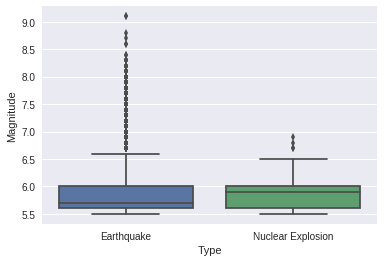

In [31]:
sns.boxplot(x='Type', y='Magnitude', data=df)

MW     7722
MWC    5668
MB     3757
MWB    2458
MWW    1983
MS     1702
ML       77
MWR      26
MD        6
MH        5
Name: Magnitude Type, dtype: int64


/home/user/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


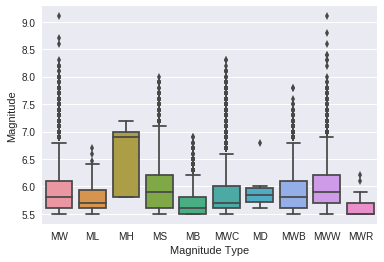

In [32]:
print(df['Magnitude Type'].value_counts())
sns.boxplot(x='Magnitude Type', y='Magnitude', data=df)
# We can seee that Magnitude type does not significantly affect Magnitude
# There are 5 MH and 6 MD, lets drop them

In [33]:
df.drop(np.where((df['Magnitude Type'] == 'MH') | (df['Magnitude Type'] == 'MD'))[0], axis = 0, inplace=True)
df.reset_index(inplace=True, drop = True)
df['Magnitude Type'].value_counts()

MW     7722
MWC    5668
MB     3757
MWB    2458
MWW    1983
MS     1702
ML       77
MWR      26
Name: Magnitude Type, dtype: int64

In [34]:
df['Location Source'].value_counts()

US        20345
ISCGEM     2581
CI           59
GCMT         56
NC           51
GUC          46
AEIC         40
UNM          21
PGC          19
WEL          18
AGS          17
ISK          15
AK           14
ATH          14
HVO          12
SPE          10
AEI           7
TEH           7
ROM           7
H             7
CASC          4
NN            4
US_WEL        4
THR           3
THE           3
ATLAS         3
JMA           3
RSPR          3
B             2
MDD           2
TUL           2
G             2
U             1
AG            1
SLC           1
OTT           1
BOU           1
CAR           1
BRK           1
LIM           1
UCR           1
SE            1
CSEM          1
PR            1
BEO           1
TAP           1
SJA           1
Name: Location Source, dtype: int64

In [35]:
# Here we won't drop the Locatoin source but will group them under 1 name - Other_loc
df.loc[(df['Location Source'] != 'US') & (df['Location Source'] != 'ISCGEM') & 
                      (df['Location Source'] != 'GCMT') & (df['Location Source'] != 'NC') & 
                      (df['Location Source'] != 'CI'),'Location Source'] = 'Other_Loc'
df['Location Source'].value_counts()

US           20345
ISCGEM        2581
Other_Loc      304
CI              59
GCMT            56
NC              51
Name: Location Source, dtype: int64

/home/user/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


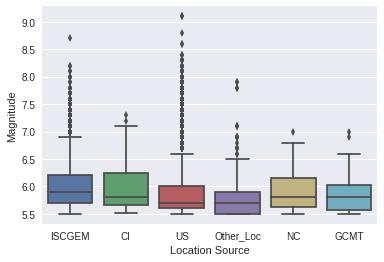

In [36]:
# still no trend
sns.boxplot(x='Location Source', y='Magnitude', data=df)

In [37]:
df['Source'].value_counts()

US           20625
ISCGEM        2460
ISCGEMSUP      120
CI              59
GCMT            55
NC              48
AK              12
OFFICIAL         8
NN               4
ATLAS            3
SE               1
PR               1
Name: Source, dtype: int64

In [38]:
# We do the same with Source column
df.loc[(df['Source'] != 'US') & (df['Source'] != 'ISCGEM') & (df['Source'] != 'CI') 
             & (df['Source'] != 'GCMT') & (df['Source'] != 'NC'),'Source'] = 'Other_Source'
df['Source'].value_counts()

US              20625
ISCGEM           2460
Other_Source      149
CI                 59
GCMT               55
NC                 48
Name: Source, dtype: int64

/home/user/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


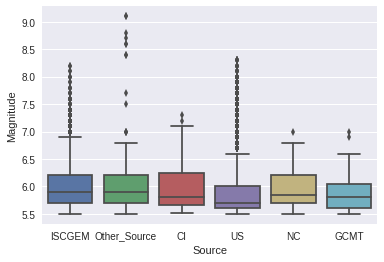

In [39]:
sns.boxplot(x='Source', y='Magnitude', data=df)

In [40]:
df['Magnitude Source'].value_counts()

US          10453
HRV          8223
ISCGEM       2580
GCMT         1489
NC            530
CI             59
AK             12
PAR             9
OFFICIAL        8
GUC             6
NN              4
NIED            4
US_GCMT         3
1000            3
ATLAS           3
BRK             2
PGC             2
1023            1
US_PGC          1
PR              1
1009            1
SE              1
1020            1
Name: Magnitude Source, dtype: int64

In [41]:
df.loc[(df['Magnitude Source'] != 'US') & (df['Magnitude Source'] != 'ISCGEM') & (df['Magnitude Source'] != 'CI') 
       & (df['Magnitude Source'] != 'GCMT') & (df['Magnitude Source'] != 'NC') 
       & (df['Magnitude Source'] != 'HRV'),'Magnitude Source'] = 'Other_Mag_Source'
df['Magnitude Source'].value_counts()

US                  10453
HRV                  8223
ISCGEM               2580
GCMT                 1489
NC                    530
Other_Mag_Source       62
CI                     59
Name: Magnitude Source, dtype: int64

/home/user/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


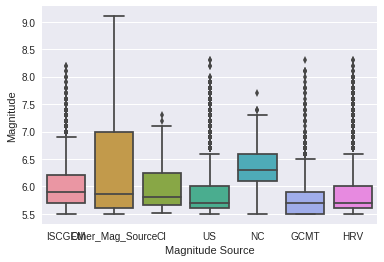

In [42]:
sns.boxplot(x='Magnitude Source', y='Magnitude', data=df)

In [44]:
# A copy that will be needed later for catboost 
df_new = df.copy()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23396 entries, 0 to 23395
Data columns (total 15 columns):
Magnitude                 23396 non-null float64
Date                      23396 non-null datetime64[ns]
Latitude                  23396 non-null float64
Longitude                 23396 non-null float64
Type                      23396 non-null object
Depth                     23396 non-null float64
Magnitude_Type            23393 non-null object
Source                    23396 non-null object
Location_Source           23396 non-null object
Magnitude_Source          23396 non-null object
Status                    23396 non-null object
Root_Mean_Square          17338 non-null float64
Azimuthal_Gap             7287 non-null float64
Depth_Seismic_Stations    7085 non-null float64
Depth_Error               4452 non-null float64
dtypes: datetime64[ns](1), float64(8), object(6)
memory usage: 2.7+ MB


In [46]:
df = pd.get_dummies(df, columns=['Source', 'Location Source', 'Magnitude Source', 'Status', 'Type', 'Magnitude Type'])

In [47]:
# Lets bring the Magnitude column to the beginging and the 4 columns to be predicted to the end
df = df.reindex(columns=(['Magnitude'] + 
                         list([a for a in df.columns if a not in ['Magnitude', 'Depth Error', 'Depth Seismic Stations','Azimuthal Gap', 'Root Mean Square']])
                         + ['Root Mean Square', 'Azimuthal Gap', 'Depth Seismic Stations','Depth Error']))

# end replace spaces by some symbol for stat models to work
new_names = []
for i in range(len(df.columns)):
    new_names.append(df.columns[i].replace(' ', '_'))
df.columns = new_names

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23396 entries, 0 to 23395
Data columns (total 40 columns):
Magnitude                            23396 non-null float64
Date                                 23396 non-null datetime64[ns]
Latitude                             23396 non-null float64
Longitude                            23396 non-null float64
Depth                                23396 non-null float64
Source_CI                            23396 non-null uint8
Source_GCMT                          23396 non-null uint8
Source_ISCGEM                        23396 non-null uint8
Source_NC                            23396 non-null uint8
Source_Other_Source                  23396 non-null uint8
Source_US                            23396 non-null uint8
Location_Source_CI                   23396 non-null uint8
Location_Source_GCMT                 23396 non-null uint8
Location_Source_ISCGEM               23396 non-null uint8
Location_Source_NC                   23396 non-null uint8
Loca

## Lets do regression the missing values in quantitative columns

### Root mean square

In [49]:
# Dont use the Magnitude and Date. While using date laptop dies
import statsmodels.formula.api as smf
formula = 'Root_Mean_Square ~ ' + ' + '.join(df.columns[2:-4])
results_RMS = smf.ols(formula, data = df[pd.notnull(df['Root_Mean_Square'])]).fit()
results_RMS.summary()

/home/user/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:1036: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/home/user/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/user/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/user/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Root_Mean_Square   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     257.8
Date:                Sat, 04 Aug 2018   Prob (F-statistic):               0.00
Time:                        21:44:19   Log-Likelihood:                 6598.5
No. Observations:               17338   AIC:                        -1.316e+04
Df Residuals:                   17318   BIC:                        -1.300e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                             0.1804      0.006     31.146      0.000       0.169       0.192
Latitude                             -0.0012   4.42e-05    -26.434      0.000      -0.001      -0.001
Longitude                         -3.999e-05   1.04e-05     -3.853      0.000   -6.03e-05   -1.96e-05
Depth                                -0.0003      1e-05    -24.948      0.000      -0.000      -0.000
Source_CI                            -0.0183      0.007     -2.592      0.010      -0.032      -0.004
Source_GCMT                        6.535e-17   7.66e-18      8.529      0.000    5.03e-17    8.04e-17
Source_ISCGEM                     -1.568e-16   1.54e-17    -10.208      0.000   -1.87e-16   -1.27e-16
Source_NC                            -0.2149      0.013    -17.147      0.000      -0.239      -0.190
Source_Other_Source                   0.0451      0.034      1.332      0.183      -0.021       0.112
Source_US                             0.3685      0.024     15.057      0.000       0.321       0.417
Location_Source_CI                   -0.0183      0.007     -2.592      0.010      -0.032      -0.004
Location_Source_GCMT              -6.324e-17   2.67e-17     -2.369      0.018   -1.16e-16   -1.09e-17
Location_Source_ISCGEM            -1.119e-16   6.75e-18    -16.588      0.000   -1.25e-16   -9.87e-17
Location_Source_NC                   -0.2149      0.013    -17.147      0.000      -0.239      -0.190
Location_Source_Other_Loc             0.2460      0.017     14.499      0.000       0.213       0.279
Location_Source_US                    0.1677      0.016     10.778      0.000       0.137       0.198
Magnitude_Source_CI                  -0.0183      0.007     -2.592      0.010      -0.032      -0.004
Magnitude_Source_GCMT                 0.0183      0.010      1.858      0.063      -0.001       0.038
Magnitude_Source_HRV                  0.0458      0.009      4.989      0.000       0.028       0.064
Magnitude_Source_ISCGEM            2.465e-18   4.02e-18      0.614      0.539   -5.41e-18    1.03e-17
Magnitude_Source_NC                   0.0357      0.011      3.263      0.001       0.014       0.057
Magnitude_Source_Other_Mag_Source     0.0787      0.031      2.520      0.012       0.017       0.140
Magnitude_Source_US                   0.0203      0.010      1.958      0.050   -2.15e-05       0.041
Status_Automatic                           0          0        nan        nan           0           0
Status_Reviewed                       0.1804      0.006     31.146      0.000       0.169       0.192
Type_Earthquake                       0.0998      0.008     12.942      0.000       0.085       0.115
Type_Nuclear_Explosion                0.0806      0.010      7.895      0.000       0.061       0.101
Magnitude_Type_MB      

In [29]:
results_RMS.mse_resid

0.027381504293465975

In [51]:
df.loc[pd.isna(df.Root_Mean_Square),'Root_Mean_Square'] = results_RMS.predict(df[pd.isna(df.Root_Mean_Square)][df.columns[2:-4]])

### DEPTH Error

In [55]:
formula = 'Depth_Error ~ ' + ' + '.join(df.columns[2:-3]) 
results_De = smf.ols(formula, data = df[pd.notnull(df['Depth_Error'])]).fit()
results_De.summary()

/home/user/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:1036: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/home/user/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/user/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/user/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Depth_Error   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     79.73
Date:                Sat, 04 Aug 2018   Prob (F-statistic):          4.02e-277
Time:                        21:49:47   Log-Likelihood:                -12686.
No. Observations:                4452   AIC:                         2.541e+04
Df Residuals:                    4431   BIC:                         2.555e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                             4.4718      0.298     14.985      0.000       3.887       5.057
Latitude                             -0.0069      0.002     -2.811      0.005      -0.012      -0.002
Longitude                             0.0012      0.001      2.105      0.035     7.9e-05       0.002
Depth                                -0.0023      0.000     -4.860      0.000      -0.003      -0.001
Source_CI                             4.0287      0.204     19.706      0.000       3.628       4.429
Source_GCMT                       -1.513e-15   3.22e-16     -4.701      0.000   -2.14e-15   -8.82e-16
Source_ISCGEM                     -4.143e-15    6.6e-16     -6.275      0.000   -5.44e-15   -2.85e-15
Source_NC                             1.7233      0.408      4.222      0.000       0.923       2.524
Source_Other_Source                   0.9315      1.265      0.736      0.462      -1.548       3.411
Source_US                            -2.2117      0.899     -2.460      0.014      -3.974      -0.449
Location_Source_CI                    4.0287      0.204     19.706      0.000       3.628       4.429
Location_Source_GCMT              -2.769e-16   1.27e-16     -2.175      0.030   -5.26e-16   -2.74e-17
Location_Source_ISCGEM             3.721e-16   4.33e-16      0.860      0.390   -4.76e-16    1.22e-15
Location_Source_NC                    1.7233      0.408      4.222      0.000       0.923       2.524
Location_Source_Other_Loc            -0.9241      0.476     -1.940      0.052      -1.858       0.010
Location_Source_US                   -0.3561      0.472     -0.755      0.450      -1.281       0.569
Magnitude_Source_CI                   4.0287      0.204     19.706      0.000       3.628       4.429
Magnitude_Source_GCMT                 0.5061      0.444      1.140      0.254      -0.364       1.377
Magnitude_Source_HRV                  0.8539      0.420      2.031      0.042       0.030       1.678
Magnitude_Source_ISCGEM            3.542e-16   1.16e-16      3.062      0.002    1.27e-16    5.81e-16
Magnitude_Source_NC                  -1.7408      0.526     -3.310      0.001      -2.772      -0.710
Magnitude_Source_Other_Mag_Source    -0.7068      1.267     -0.558      0.577      -3.190       1.777
Magnitude_Source_US                   1.5307      0.508      3.016      0.003       0.536       2.526
Status_Automatic                           0          0        nan        nan           0           0
Status_Reviewed                       4.4718      0.298     14.985      0.000       3.887       5.057
Type_Earthquake                      -6.0780      0.637     -9.537      0.000      -7.327      -4.829
Type_Nuclear_Explosion               10.5498      0.872     12.105      0.000       8.841      12.258
Magnitude_Type_MB      

In [58]:
# MSE is kinda reasonable, lets replace by predicted values
print(results_De.mse_resid)
df.loc[pd.isna(df.Depth_Error), 'Depth_Error'] = results_De.predict(df[pd.isna(df.Depth_Error)][df.columns[2:-3]])

17.56278830276929


### Azimuthal_Gap

#### Linear model

In [124]:
formula = 'Azimuthal_Gap ~ ' + ' + '.join(df.columns[2:-3])
results_Az = smf.ols(formula, data = df[pd.notnull(df['Azimuthal_Gap'])]).fit()
results_Az.summary()

/home/user/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:1036: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/home/user/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/user/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/user/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Azimuthal_Gap   R-squared:                       0.372
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     205.1
Date:                Mon, 30 Jul 2018   Prob (F-statistic):               0.00
Time:                        00:10:57   Log-Likelihood:                -33805.
No. Observations:                7287   AIC:                         6.765e+04
Df Residuals:                    7265   BIC:                         6.781e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                            35.1267      2.601     13.504      0.000      30.028      40.226
Latitude                              0.0247      0.010      2.364      0.018       0.004       0.045
Longitude                            -0.0475      0.002    -19.033      0.000      -0.052      -0.043
Depth                                -0.0358      0.002    -14.366      0.000      -0.041      -0.031
Source_CI                             9.6179      2.414      3.985      0.000       4.887      14.349
Source_GCMT                        3.903e-14   1.83e-14      2.129      0.033    3.09e-15     7.5e-14
Source_ISCGEM                     -1.909e-14   7.49e-15     -2.550      0.011   -3.38e-14   -4.41e-15
Source_NC                            51.3117     10.163      5.049      0.000      31.389      71.235
Source_Other_Source                 -42.1587      8.983     -4.693      0.000     -59.768     -24.549
Source_US                            16.3558      8.249      1.983      0.047       0.184      32.527
Location_Source_CI                    9.6179      2.414      3.985      0.000       4.887      14.349
Location_Source_GCMT                 24.5387     20.599      1.191      0.234     -15.842      64.919
Location_Source_ISCGEM            -2.151e-14   1.01e-14     -2.138      0.033   -4.12e-14   -1.79e-15
Location_Source_NC                  -33.1085     20.159     -1.642      0.101     -72.626       6.409
Location_Source_Other_Loc            14.5661      8.710      1.672      0.094      -2.508      31.640
Location_Source_US                   19.5124      8.604      2.268      0.023       2.645      36.379
Magnitude_Source_CI                   9.6179      2.414      3.985      0.000       4.887      14.349
Magnitude_Source_GCMT                -9.4752      3.835     -2.471      0.014     -16.993      -1.958
Magnitude_Source_HRV                 -0.3243      3.856     -0.084      0.933      -7.884       7.235
Magnitude_Source_ISCGEM             5.24e-15   2.99e-15      1.755      0.079   -6.14e-16    1.11e-14
Magnitude_Source_NC                  51.3117     10.163      5.049      0.000      31.389      71.235
Magnitude_Source_Other_Mag_Source     2.9071      6.162      0.472      0.637      -9.172      14.986
Magnitude_Source_US                 -18.9106      3.816     -4.956      0.000     -26.390     -11.431
Status_Automatic                           0          0        nan        nan           0           0
Status_Reviewed                      35.1267      2.601     13.504      0.000      30.028      40.226
Type_Earthquake                     -41.1012      3.792    -10.840      0.000     -48.534     -33.669
Type_Nuclear_Explosion               76.2279      5.091     14.973      0.000      66.248      86.208
Magnitude_Type_MB      

In [125]:
MSE is too large. I tried to get some connections in weak estimators but it lowered MSE to 570 which is not enough
results_Az.mse_resid

628.4359908246118

#### XGB regreessor

In [69]:
X_tr_sm, X_test_sm, y_tr_sm, y_test_sm = train_test_split(df.drop(['Magnitude', 'Date', 'Depth_Seismic_Stations'], axis=1).dropna(), df['Azimuthal_Gap'].dropna(), test_size=0.3, random_state = 0, shuffle=True) 

In [72]:
%%time
import xgboost as xgb
model_xgb = xgb.XGBRegressor(max_depth = 8, learning_rate = 0.1, random_state=1)
cross_val_score_xgb = np.mean(-cross_val_score(model_xgb, X = X_tr_sm, y = y_tr_sm,
                         cv = ShuffleSplit(n_splits=3, test_size=0.3, random_state=0),
                         scoring='neg_mean_squared_error'))
model_xgb.fit(X_tr_sm, y_tr_sm)
print('Cross_validation score of XGB is: ', cross_val_score_xgb)
print('Test score of XGB is: ', mean_squared_error(model_xgb.predict(X_test_sm), y_test_sm))

Cross_validation score of XGB is:  0.19135242369221375
Test score of XGB is:  0.18308782797159212
CPU times: user 6.21 s, sys: 10.1 ms, total: 6.22 s
Wall time: 6.22 s


In [77]:
# Xgboost behaved pretty well, lets replace
df.loc[pd.isna(df.Azimuthal_Gap), 'Azimuthal_Gap'] = model_xgb.predict(df[pd.isna(df.Azimuthal_Gap)].drop(['Magnitude', 'Date', 'Depth_Seismic_Stations'], axis=1))

### Depth_Seismic_Stations 

In [88]:
# XGB behaved much more better than linear or polynomial regressions
X_tr_sm, X_test_sm, y_tr_sm, y_test_sm = train_test_split(df.drop(['Magnitude', 'Date'], axis=1).dropna(), df['Depth_Seismic_Stations'].dropna(), test_size=0.3, random_state = 0, shuffle=True) 

import xgboost as xgb
model_xgb = xgb.XGBRegressor(max_depth = 10, learning_rate = 0.1, random_state=1)

cross_val_score_xgb = np.mean(-cross_val_score(model_xgb, X = X_tr_sm, y = y_tr_sm,
                         cv = ShuffleSplit(n_splits=3, test_size=0.3, random_state=0),
                         scoring='neg_mean_squared_error'))
model_xgb.fit(X_tr_sm, y_tr_sm)
print('Cross_validation score of XGB is: ', cross_val_score_xgb)
print('Test score of XGB is: ', mean_squared_error(model_xgb.predict(X_test_sm), y_test_sm))

Cross_validation score of XGB is:  0.5895566754544107
Test score of XGB is:  0.6794182464084974


In [89]:
# Xgboost behaved pretty well, lets replace
df.loc[pd.isna(df.Depth_Seismic_Stations), 'Depth_Seismic_Stations'] = model_xgb.predict(df[pd.isna(df.Depth_Seismic_Stations)].drop(['Magnitude', 'Date'], axis=1))

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23396 entries, 0 to 23395
Data columns (total 40 columns):
Magnitude                            23396 non-null float64
Date                                 23396 non-null datetime64[ns]
Latitude                             23396 non-null float64
Longitude                            23396 non-null float64
Depth                                23396 non-null float64
Source_CI                            23396 non-null uint8
Source_GCMT                          23396 non-null uint8
Source_ISCGEM                        23396 non-null uint8
Source_NC                            23396 non-null uint8
Source_Other_Source                  23396 non-null uint8
Source_US                            23396 non-null uint8
Location_Source_CI                   23396 non-null uint8
Location_Source_GCMT                 23396 non-null uint8
Location_Source_ISCGEM               23396 non-null uint8
Location_Source_NC                   23396 non-null uint8
Loca

In [201]:
# # df.info()

# mean sq log error

# use mse loss, but predict log([price)])

## Lets try some tree models

In [91]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(df.drop(['Magnitude', 'Date'], axis=1), df['Magnitude'], test_size=0.3, random_state=0, shuffle=True )

In [93]:
# function does grid search of parameters, prints the cross val score, the final train and test scores
# returns the best model
def gridsearcher(model, tuned_parameters, X_train, X_test, y_train, y_test):
    model_grid = GridSearchCV(model(random_state=1), tuned_parameters, cv = 3,
                       scoring='neg_mean_squared_error')
    model_grid.fit(X_train, y_train)
    print("Best parameters set found on development set:")
    print()
    print(model_grid.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = model_grid.cv_results_['mean_test_score']
    stds = model_grid.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, model_grid.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()
    print('Train score is: ', mean_squared_error(model_grid.predict(X_train), y_train))
    print('Test score is: ', mean_squared_error(model_grid.predict(X_test), y_test))
    
    return model_grid

### Bagging tree Test score is:  0.1403

In [98]:
%%time
from sklearn.ensemble import BaggingRegressor
tuned_parameters = [{'n_estimators': [30, 50, 75, 100]}]
model_bag = gridsearcher(BaggingRegressor, tuned_parameters, X_train, X_test, y_train, y_test)

Best parameters set found on development set:

{'n_estimators': 100}

Grid scores on development set:

-0.144 (+/-0.014) for {'n_estimators': 30}
-0.142 (+/-0.014) for {'n_estimators': 50}
-0.141 (+/-0.013) for {'n_estimators': 75}
-0.141 (+/-0.013) for {'n_estimators': 100}

Train score is:  0.01966066600144814
Test score is:  0.14038143003684278
CPU times: user 2min 21s, sys: 99.8 ms, total: 2min 21s
Wall time: 2min 21s


### Random forest. Test score is:  0.1319

In [97]:
%%time
from sklearn.ensemble import RandomForestRegressor
tuned_parameters = [{'n_estimators': [30, 50, 100], 'max_depth': [8, 10,15]}]
model_Forest = gridsearcher(RandomForestRegressor, tuned_parameters, X_train, X_test, y_train, y_test)

Best parameters set found on development set:

{'max_depth': 15, 'n_estimators': 100}

Grid scores on development set:

-0.138 (+/-0.018) for {'max_depth': 8, 'n_estimators': 30}
-0.138 (+/-0.018) for {'max_depth': 8, 'n_estimators': 50}
-0.138 (+/-0.018) for {'max_depth': 8, 'n_estimators': 100}
-0.136 (+/-0.018) for {'max_depth': 10, 'n_estimators': 30}
-0.136 (+/-0.018) for {'max_depth': 10, 'n_estimators': 50}
-0.136 (+/-0.017) for {'max_depth': 10, 'n_estimators': 100}
-0.136 (+/-0.016) for {'max_depth': 15, 'n_estimators': 30}
-0.135 (+/-0.016) for {'max_depth': 15, 'n_estimators': 50}
-0.134 (+/-0.015) for {'max_depth': 15, 'n_estimators': 100}

Train score is:  0.07493833993911184
Test score is:  0.13193089929632026
CPU times: user 2min 30s, sys: 51.5 ms, total: 2min 30s
Wall time: 2min 30s


/home/user/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


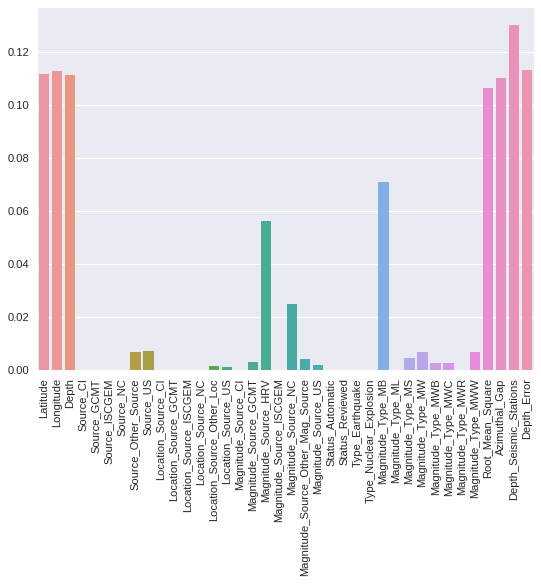

In [101]:
model_Rand_Forest = RandomForestRegressor(n_estimators = 100, max_depth=15, random_state=1)
model_Rand_Forest.fit(X_train, y_train)

from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80)
sns.barplot(x = X_train.columns, y = model_Rand_Forest.feature_importances_, orient=90, hue_order = 'ascending')
plt.xticks(rotation = 90)

print()

### Adaboost Test score -  0.1599

In [102]:
%%time
from sklearn.ensemble import AdaBoostRegressor
tuned_parameters = [{'n_estimators': [10, 25, 40, 50], 'learning_rate': [0.001, 0.01, 0.1]}]
Ada_model = gridsearcher(AdaBoostRegressor, tuned_parameters, X_train, X_test, y_train, y_test)

Best parameters set found on development set:

{'learning_rate': 0.01, 'n_estimators': 25}

Grid scores on development set:

-0.160 (+/-0.020) for {'learning_rate': 0.001, 'n_estimators': 10}
-0.159 (+/-0.020) for {'learning_rate': 0.001, 'n_estimators': 25}
-0.159 (+/-0.020) for {'learning_rate': 0.001, 'n_estimators': 40}
-0.159 (+/-0.021) for {'learning_rate': 0.001, 'n_estimators': 50}
-0.160 (+/-0.019) for {'learning_rate': 0.01, 'n_estimators': 10}
-0.159 (+/-0.021) for {'learning_rate': 0.01, 'n_estimators': 25}
-0.160 (+/-0.019) for {'learning_rate': 0.01, 'n_estimators': 40}
-0.160 (+/-0.019) for {'learning_rate': 0.01, 'n_estimators': 50}
-0.159 (+/-0.021) for {'learning_rate': 0.1, 'n_estimators': 10}
-0.161 (+/-0.015) for {'learning_rate': 0.1, 'n_estimators': 25}
-0.166 (+/-0.015) for {'learning_rate': 0.1, 'n_estimators': 40}
-0.173 (+/-0.010) for {'learning_rate': 0.1, 'n_estimators': 50}

Train score is:  0.15832320864785315
Test score is:  0.15991046742133935
CPU times

/home/user/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)



CPU times: user 2.44 s, sys: 38 µs, total: 2.44 s
Wall time: 2.43 s


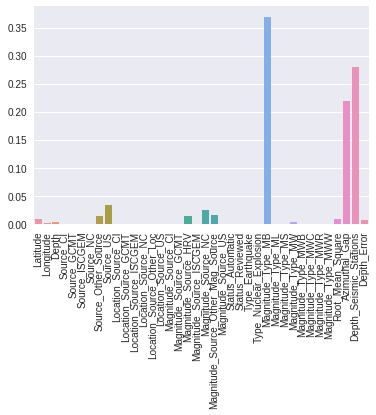

In [104]:
%%time
model_adaboost = AdaBoostRegressor(n_estimators= 25, learning_rate=0.01, random_state=1)
model_adaboost.fit(X_train, y_train)

sns.barplot(x = X_train.columns, y = model_adaboost.feature_importances_, orient=90, hue_order = 'ascending')
plt.xticks(rotation = 90)
print()

### Gradient boosting, Test score - 0.1307

In [172]:
%%time
from sklearn.ensemble import GradientBoostingRegressor
tuned_parameters = [{'n_estimators': [30, 50, 100], 'learning_rate': [0.05, 0.08, 0.1], 
                    'max_depth': [3, 5, 8, 10]}]
Grad_params = gridsearcher(GradientBoostingRegressor, tuned_parameters, X_train, X_test, y_train, y_test)

Best parameters set found on development set:

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}

Grid scores on development set:

-0.153 (+/-0.020) for {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 30}
-0.146 (+/-0.020) for {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 50}
-0.140 (+/-0.019) for {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
-0.144 (+/-0.019) for {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 30}
-0.139 (+/-0.019) for {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 50}
-0.135 (+/-0.018) for {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100}
-0.138 (+/-0.018) for {'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 30}
-0.134 (+/-0.017) for {'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 50}
-0.134 (+/-0.016) for {'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 100}
-0.137 (+/-0.018) for {'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 30}
-0.135 (+/-0.017) for {'learning_ra

Cross_validation score of Gradient boosting is:  0.1345981823392173
Test score of Adaboost is:  0.13070836238926914


/home/user/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)



CPU times: user 23.5 s, sys: 24 ms, total: 23.5 s
Wall time: 23.5 s


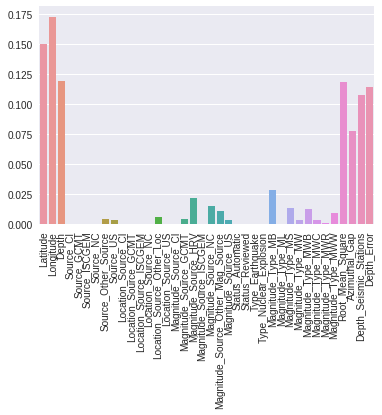

In [108]:
%%time
from sklearn.ensemble import GradientBoostingRegressor
model_grad_boost = GradientBoostingRegressor(n_estimators = 100, learning_rate = 0.1, max_depth = 5) # n
cross_val_score_GradBoost = np.mean(-cross_val_score(model_grad_boost, X = X_train, y = y_train,
                     cv = ShuffleSplit(n_splits=3, test_size=0.3, random_state=0),
                     scoring='neg_mean_squared_error'))
model_grad_boost.fit(X_train, y_train)
print('Cross_validation score of Gradient boosting is: ', cross_val_score_GradBoost)
print('Test score of Gradien boost is: ', mean_squared_error(model_grad_boost.predict(X_test), y_test))
sns.barplot(x = X_train.columns, y = model_grad_boost.feature_importances_, orient=90, hue_order = 'ascending')
plt.xticks(rotation = 90)
print()

### XGboost  Test score -  0.1302

In [110]:
%%time
import xgboost as xgb
tuned_parameters = [{'n_estimators': [30, 50, 100], 'learning_rate': [0.05, 0.08, 0.1], 
                    'max_depth': [3, 5, 8, 10]}]
Xgb_params = gridsearcher(xgb.XGBRegressor, tuned_parameters, X_train, X_test, y_train, y_test)

Best parameters set found on development set:

{'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 100}

Grid scores on development set:

-1.491 (+/-0.050) for {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 30}
-0.320 (+/-0.031) for {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 50}
-0.142 (+/-0.020) for {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
-1.487 (+/-0.051) for {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 30}
-0.314 (+/-0.031) for {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 50}
-0.136 (+/-0.019) for {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100}
-1.486 (+/-0.050) for {'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 30}
-0.313 (+/-0.029) for {'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 50}
-0.134 (+/-0.018) for {'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 100}
-1.486 (+/-0.050) for {'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 30}
-0.314 (+/-0.028) for {'learning_ra

Cross_validation score of XGB is:  0.13351125788716509
Test score of XGB is:  0.13022474138195986


/home/user/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)



CPU times: user 22.5 s, sys: 36.1 ms, total: 22.5 s
Wall time: 22.5 s


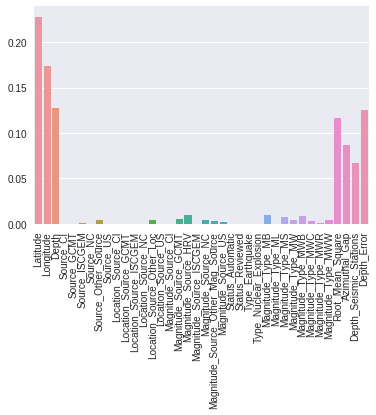

In [109]:
%%time
model_xgb = xgb.XGBRegressor(n_estimators=100, max_depth=8, learning_rate = 0.08, random_state=1)
cross_val_score_xgb = np.mean(-cross_val_score(model_xgb, X = X_train, y = y_train,
                         cv = ShuffleSplit(n_splits=3, test_size=0.3, random_state=0),
                         scoring='neg_mean_squared_error'))
model_xgb.fit(X_train, y_train)
print('Cross_validation score of XGB is: ', cross_val_score_xgb)
print('Test score of XGB is: ', mean_squared_error(model_xgb.predict(X_test), y_test))
sns.barplot(x = X_train.columns, y = model_xgb.feature_importances_, orient=90, hue_order = 'ascending')
plt.xticks(rotation = 90)
print()

### Light GBM. Test score -  0.1288 Best test score

In [115]:
%%time
import lightgbm as lgb
params = {'max_depth':[10,30,50], 'learning_rate':[0.1, 0.01, 0.05],'n_estimators':[15, 30, 50, 100]}
lgb_model = gridsearcher(lgb.LGBMRegressor, tuned_parameters, X_train, X_test, y_train, y_test)

Best parameters set found on development set:

{'learning_rate': 0.08, 'max_depth': 10, 'n_estimators': 100}

Grid scores on development set:

-0.153 (+/-0.020) for {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 30}
-0.147 (+/-0.020) for {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 50}
-0.141 (+/-0.020) for {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
-0.145 (+/-0.020) for {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 30}
-0.140 (+/-0.020) for {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 50}
-0.135 (+/-0.019) for {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100}
-0.140 (+/-0.019) for {'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 30}
-0.136 (+/-0.018) for {'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 50}
-0.133 (+/-0.018) for {'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 100}
-0.140 (+/-0.019) for {'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 30}
-0.135 (+/-0.019) for {'learning_

Cross_validation score of LGB is:  0.13217609637915897
Test score of LGB is:  0.12886587371259248


/home/user/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)



CPU times: user 3.03 s, sys: 40 ms, total: 3.07 s
Wall time: 3.06 s


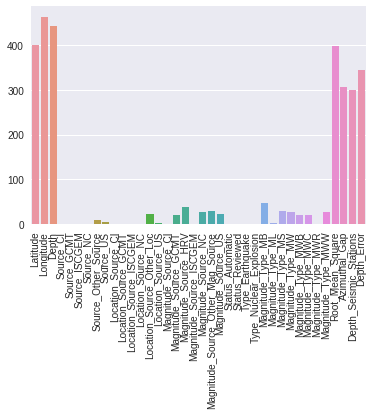

In [120]:
%%time
import lightgbm as lgb
model_lgb = lgb.LGBMRegressor(n_estimators=100, max_depth = 10, learning_rate = 0.08, reg_alpha=0.1, random_state=1)
cross_val_score_lgb = np.mean(-cross_val_score(model_lgb, X = X_train, y = y_train,
                         cv = ShuffleSplit(n_splits=3, test_size=0.3, random_state=0),
                         scoring='neg_mean_squared_error'))
model_lgb.fit(X_train, y_train)
print('Cross_validation score of LGB is: ', cross_val_score_lgb)
print('Test score of LGB is: ', mean_squared_error(model_lgb.predict(X_test), y_test))
sns.barplot(x = X_train.columns, y = model_lgb.feature_importances_, orient=90, hue_order = 'ascending')
plt.xticks(rotation = 90)
print()

### Catboost, df with dummy variables, Test score of Catboost is:  0.1294

Cross_validation score of Catboost is:  0.1322457350055353
Test score of Catboost is:  0.12943456606089665


/home/user/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)



CPU times: user 5min 1s, sys: 27.9 s, total: 5min 29s
Wall time: 1min 52s


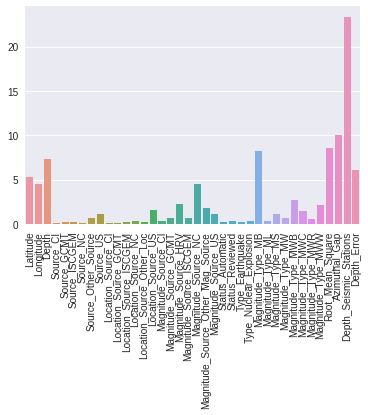

In [165]:
%%time
from catboost import CatBoostRegressor
model_cat = CatBoostRegressor(silent = True, random_state = 1)
cross_val_score_cat = np.mean(-cross_val_score(model_cat, X = X_train, y = y_train,
                         cv = ShuffleSplit(n_splits=3, test_size=0.3, random_state=0),
                         scoring='neg_mean_squared_error'))
model_cat.fit(X_train, y_train)
print('Cross_validation score of Catboost is: ', cross_val_score_cat)
print('Test score of Catboost is: ', mean_squared_error(model_cat.predict(X_test), y_test))
sns.barplot(x = X_train.columns, y = model_cat.feature_importances_, orient=90, hue_order = 'ascending')
plt.xticks(rotation = 90)
print()

### Catboost without dummy variables Test score  0.1303

In [147]:
# just for interest lets replace the predicted columns of df here and give catboost the 
# indexes if the categorical varibales
# df_new.loc[:,'Root Mean Square']] = df[['Depth_Error', 'Depth_Seismic_Stations','Azimuthal_Gap', 'Root_Mean_Square']]
df_new.loc[:,'Depth Error'] = df.Depth_Error
df_new.loc[:,'Depth Seismic Stations'] = df.Depth_Seismic_Stations
df_new.loc[:,'Azimuthal Gap'] = df.Azimuthal_Gap
df_new.loc[:,'Root Mean Square'] = df.Root_Mean_Square
df_new.dropna(inplace=True)

In [152]:
from sklearn.model_selection import train_test_split
X_trainn, X_testt, y_trainn, y_testt = train_test_split(df_new.drop(['Magnitude', 'Date'], axis=1), df_new['Magnitude'], test_size=0.3, random_state=0,)

Cross_validation score of Catboost is:  0.1322457350055353
Test score of Catboost is  0.1303601483832226


/home/user/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


CPU times: user 6min 46s, sys: 33.8 s, total: 7min 20s
Wall time: 2min 9s


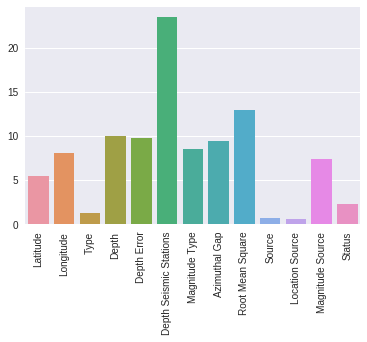

In [171]:
%%time
from catboost import CatBoostRegressor
categorical_features_indices = np.where(df_new.drop(['Magnitude', 'Date'], axis=1).dtypes != np.float)[0]
model_cat2 = CatBoostRegressor(learning_rate=0.1, silent=True, random_state=1)
cross_val_score_cat2 = np.mean(-cross_val_score(model_cat2, fit_params={'cat_features':categorical_features_indices}, 
                                                X = X_trainn, y = y_trainn,
                         cv = ShuffleSplit(n_splits=3, test_size=0.3, random_state=0),
                         scoring='neg_mean_squared_error'))
model_cat2.fit(X_trainn, y_trainn, cat_features=categorical_features_indices)
print('Cross_validation score of Catboost is: ', cross_val_score_cat)
print('Test score of Catboost is ', mean_squared_error(model_cat2.predict(X_testt), y_testt))
sns.barplot(x = X_trainn.columns, y = model_cat2.feature_importances_, orient=90, hue_order = 'ascending')
plt.xticks(rotation = 90)

## Conclusion

Overall the best score gave lightGBM but Catboost and xgboost were pretty close. 